<a href="https://colab.research.google.com/github/Sanim27/Fashion_Mnist/blob/main/NN_for_fash_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torch.utils.data as data
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
%matplotlib inline

In [112]:
train_ds=torchvision.datasets.FashionMNIST(root="data",train=True,download=True,transform=torchvision.transforms.ToTensor())

In [113]:
train_ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [114]:
train_ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [115]:
train_ds,val_ds=random_split(train_ds,[50000,10000])

In [116]:
train_ds

In [117]:
image,label=train_ds[0]

In [118]:
def show_image(img,label):
    plt.imshow(img[0],cmap="gray")
    plt.title(f"{label}")
    plt.axis("off")
    plt.show()

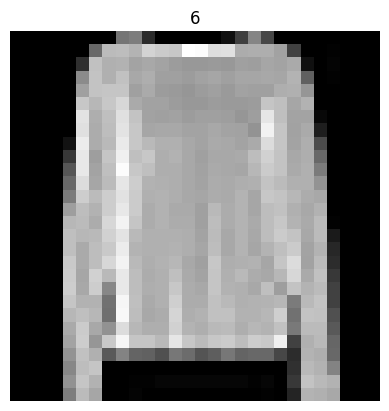

In [119]:
show_image(*train_ds[20])

In [120]:
class MnistFashoin(nn.Module):
  def __init__(self,in_size,hidden_size1,hidden_size2,out_size):
    super().__init__()
    self.linear1=nn.Linear(in_size,hidden_size1)
    self.linear2=nn.Linear(hidden_size1,hidden_size2)
    self.linear3=nn.Linear(hidden_size2,out_size)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear1(xb)
    out=F.relu(out)
    out=self.linear2(out)
    out=F.relu(out)
    out=self.linear3(out)
    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc=accuracyy(out,labels)
    return {'val_loss':loss.detach(),'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accs=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}] val_loss: {} , val_accuracy: {}".format(epoch,result['val_loss'],result['val_acc']))

In [121]:
def accuracyy(outputs,labels):
  _,pred=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(pred==labels).item()/len(pred))

In [122]:
def fit(epochs,lr,model,train_dl,val_dl,opt_func=torch.optim.Adam):
  opt=opt_func(model.parameters(),lr)
  history=[]
  for epoch in range(epochs):
    for batch in train_dl:
      loss=model.training_step(batch)
      loss.backward()
      opt.step()
      opt.zero_grad()
    result=evaluate(model,val_dl)
    model.epoch_end(epoch,result)
    history.append(result)
  return history

In [123]:
def evaluate(model,val_dl):
  outputs=[model.validation_step(batch) for batch in val_dl]
  return model.validation_epoch_end(outputs)

In [124]:
train_loader=DataLoader(train_ds,batch_size=128,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size=128,num_workers=4,pin_memory=True)

Shape of image: torch.Size([128, 1, 28, 28])


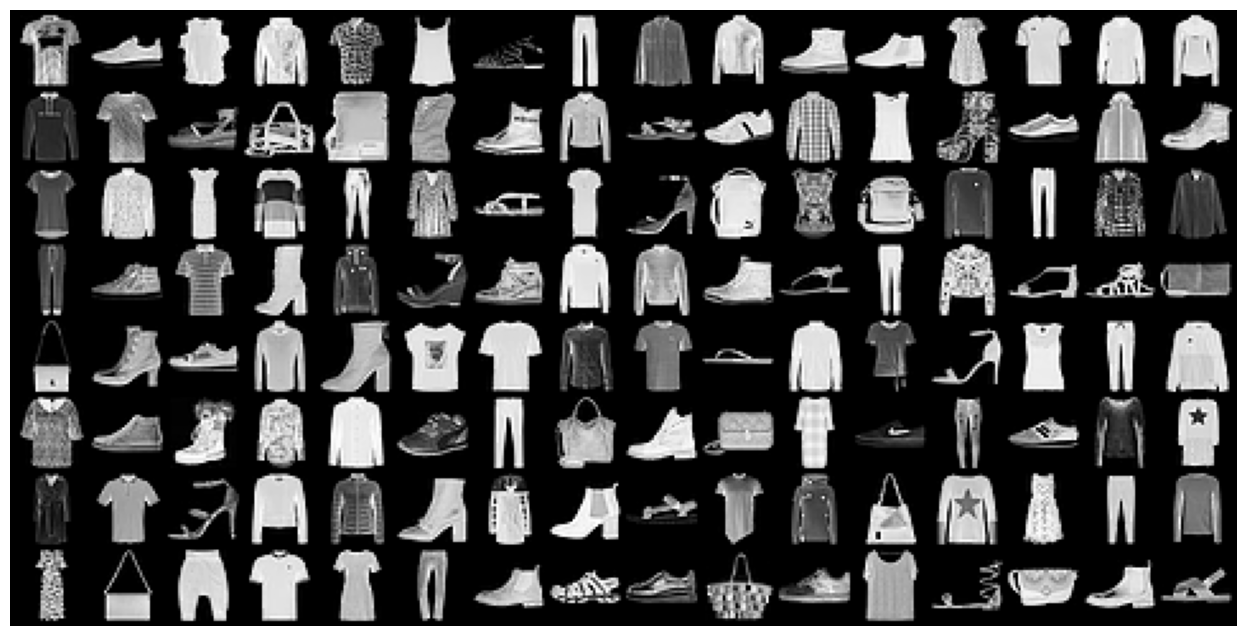

In [125]:
for images,_ in train_loader:
  print("Shape of image:",images.shape)
  plt.figure(figsize=(16,8))
  plt.axis("off")
  plt.imshow(torchvision.utils.make_grid(images,nrow=16).permute(1,2,0))
  break

In [126]:
for images,labels in train_loader:
  print("Shape of image:",images.shape)
  inputs=images.reshape(-1,784)
  print("Shape of image:",inputs.shape)
  break

Shape of image: torch.Size([128, 1, 28, 28])
Shape of image: torch.Size([128, 784])


In [127]:
layer1=nn.Linear(input_size,hidden_size1)

In [128]:
layer1.weight.shape

torch.Size([64, 784])

In [129]:
input_size=inputs.shape[-1]
hidden_size1=64
hidden_size2=32
output_size=10

In [130]:
model=MnistFashoin(input_size,hidden_size1,hidden_size2,output_size)

In [131]:
for t in model.parameters():
  print(t.shape)

torch.Size([64, 784])
torch.Size([64])
torch.Size([32, 64])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [132]:
for images,labels in train_loader:
  print(images.shape)
  outputs=model(images)
  loss=F.cross_entropy(outputs,labels)
  print('loss: ',loss.item())
  break

torch.Size([128, 1, 28, 28])
loss:  2.321660041809082


In [133]:
print(outputs.shape)
print(outputs[:2].data)

torch.Size([128, 10])
tensor([[ 0.1667, -0.1322, -0.1197,  0.0457,  0.1626,  0.1074, -0.2040,  0.1095,
         -0.1409, -0.1303],
        [ 0.1195, -0.1043, -0.0974,  0.0033,  0.1342,  0.0820, -0.1152,  0.0938,
         -0.1561, -0.1663]])


In [134]:
history=[evaluate(model,val_loader)]
history

[{'val_loss': 2.311791181564331, 'val_acc': 0.08514636009931564}]

In [135]:
history1=fit(5,0.0001,model,train_loader,val_loader)

Epoch [0] val_loss: 0.9313337206840515 , val_accuracy: 0.6815664768218994
Epoch [1] val_loss: 0.7036211490631104 , val_accuracy: 0.754054605960846
Epoch [2] val_loss: 0.6218953132629395 , val_accuracy: 0.7815466523170471
Epoch [3] val_loss: 0.5738978981971741 , val_accuracy: 0.7992483973503113
Epoch [4] val_loss: 0.5422587394714355 , val_accuracy: 0.813093364238739


In [136]:
history2=fit(5,0.000001,model,train_loader,val_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [0] val_loss: 0.540684700012207 , val_accuracy: 0.8148733973503113
Epoch [1] val_loss: 0.5400195717811584 , val_accuracy: 0.815664529800415
Epoch [2] val_loss: 0.5395953059196472 , val_accuracy: 0.8152689933776855
Epoch [3] val_loss: 0.5392032861709595 , val_accuracy: 0.816257894039154
Epoch [4] val_loss: 0.5389560461044312 , val_accuracy: 0.8160601258277893


In [137]:
history3=fit(5,0.00001,model,train_loader,val_loader)

Epoch [0] val_loss: 0.538604736328125 , val_accuracy: 0.8166534900665283
Epoch [1] val_loss: 0.5382806062698364 , val_accuracy: 0.8168512582778931
Epoch [2] val_loss: 0.5380217432975769 , val_accuracy: 0.8166534900665283
Epoch [3] val_loss: 0.5377516746520996 , val_accuracy: 0.8166534900665283
Epoch [4] val_loss: 0.5374448895454407 , val_accuracy: 0.8172468543052673


In [138]:
history4=fit(5,0.0001,model,train_loader,val_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [0] val_loss: 0.516502857208252 , val_accuracy: 0.8251582384109497
Epoch [1] val_loss: 0.49837183952331543 , val_accuracy: 0.8307951092720032
Epoch [2] val_loss: 0.486598402261734 , val_accuracy: 0.8350474834442139
Epoch [3] val_loss: 0.47258687019348145 , val_accuracy: 0.8390031456947327
Epoch [4] val_loss: 0.4643440842628479 , val_accuracy: 0.8415743708610535


In [139]:
history4=fit(5,0.001,model,train_loader,val_loader)

Epoch [0] val_loss: 0.4448912441730499 , val_accuracy: 0.8498813509941101
Epoch [1] val_loss: 0.41269394755363464 , val_accuracy: 0.8578916192054749
Epoch [2] val_loss: 0.4153219163417816 , val_accuracy: 0.8519580960273743
Epoch [3] val_loss: 0.3912941515445709 , val_accuracy: 0.8639240264892578
Epoch [4] val_loss: 0.37262073159217834 , val_accuracy: 0.8678797483444214


In [140]:
history5=fit(5,0.001,model,train_loader,val_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [0] val_loss: 0.36108821630477905 , val_accuracy: 0.8713409900665283
Epoch [1] val_loss: 0.34624168276786804 , val_accuracy: 0.8771756291389465
Epoch [2] val_loss: 0.3375834822654724 , val_accuracy: 0.8786590099334717
Epoch [3] val_loss: 0.33632877469062805 , val_accuracy: 0.8793512582778931
Epoch [4] val_loss: 0.3513314425945282 , val_accuracy: 0.876186728477478


In [141]:
history6=fit(5,0.01,model,train_loader,val_loader)

Epoch [0] val_loss: 0.43824636936187744 , val_accuracy: 0.8416732549667358
Epoch [1] val_loss: 0.42116817831993103 , val_accuracy: 0.8468156456947327
Epoch [2] val_loss: 0.3879086375236511 , val_accuracy: 0.8624406456947327
Epoch [3] val_loss: 0.38754093647003174 , val_accuracy: 0.8623417615890503
Epoch [4] val_loss: 0.3491984009742737 , val_accuracy: 0.8768789768218994


In [142]:
history7=fit(5,0.002,model,train_loader,val_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [0] val_loss: 0.32784080505371094 , val_accuracy: 0.8823180198669434
Epoch [1] val_loss: 0.3203575909137726 , val_accuracy: 0.8877571225166321
Epoch [2] val_loss: 0.3314582407474518 , val_accuracy: 0.8836036324501038
Epoch [3] val_loss: 0.3151780664920807 , val_accuracy: 0.8879548907279968
Epoch [4] val_loss: 0.32048463821411133 , val_accuracy: 0.8889438509941101


In [143]:
history=history1+history2+history3+history4+history5+history6+history7

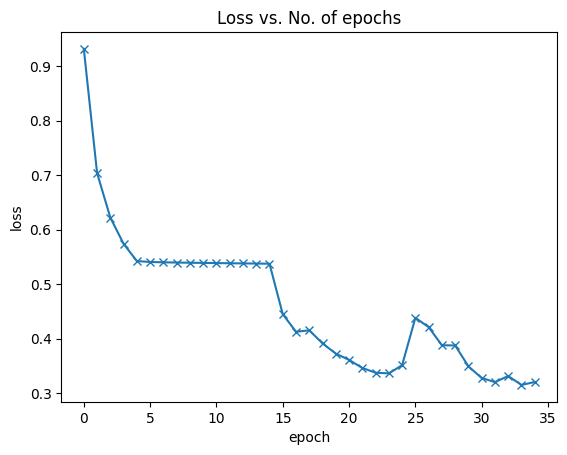

In [144]:
losses=[x['val_loss'] for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

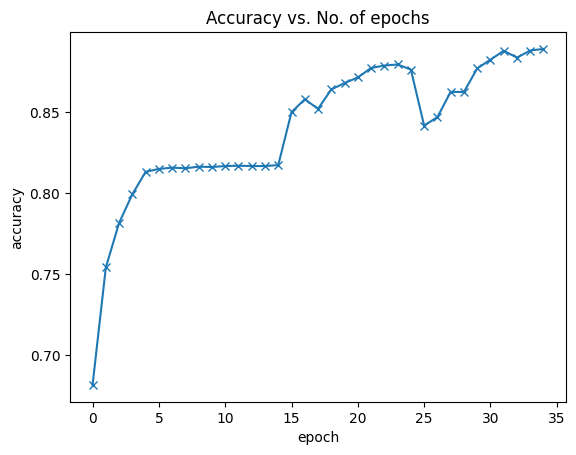

In [145]:
accuracies=[x['val_acc'] for x in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [146]:
test_ds=torchvision.datasets.FashionMNIST(root="data",train=False,download=True,transform=torchvision.transforms.ToTensor())

In [147]:
test_loader=DataLoader(test_ds,batch_size=128,num_workers=4,pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [148]:
evaluate(model,test_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


{'val_loss': 0.3596864640712738, 'val_acc': 0.8771756291389465}

In [149]:
img,label=test_ds[0]

In [150]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _,pred=torch.max(yb,dim=1)
  return pred[0].item()

In [164]:
def show_label_prediction(img,label,pred):
  plt.imshow(img[0],cmap="gray")
  plt.title(f"Label: {label}, Predicted: {pred}")
  plt.axis("off")
  plt.show()

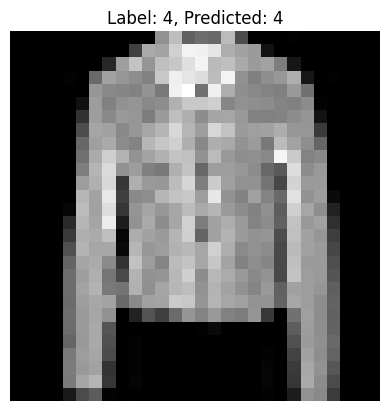

In [165]:
img,label=test_ds[10]
pred=predict_image(img,model)
show_label_prediction(img,label,pred)

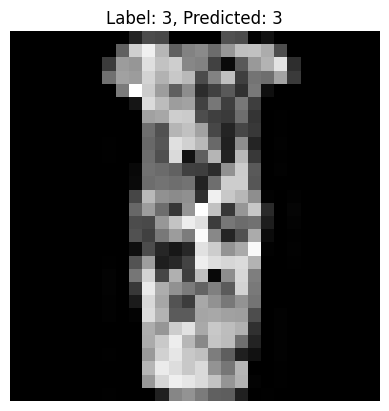

In [166]:
img,label=test_ds[100]
pred=predict_image(img,model)
show_label_prediction(img,label,pred)

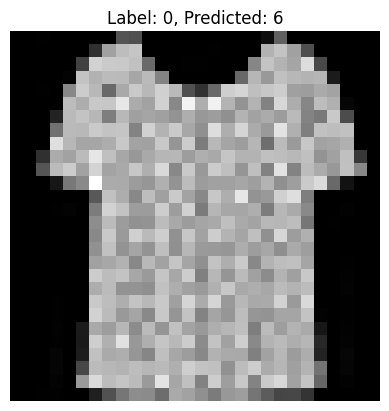

In [172]:
img,label=test_ds[1000]
pred=predict_image(img,model)
show_label_prediction(img,label,pred)